# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## * [API CoinGecko](https://www.coingecko.com/es/api/documentation):

### Listado de monedas:

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10060                  zynecoin    zyn                   Zynecoin
10061                   zynergy    zyn                    Zynergy
10062                     zyrri    zyr                      Zyrri
10063                       zyx    zyx                        ZYX
10064                       zzz    zzz                GoSleep ZZZ

[10065 rows x 3 columns]


In [3]:
coin_id = coin_id.drop_duplicates()

In [4]:
coin_id.isnull().sum()

id        0
symbol    0
name      0
dtype: int64

In [5]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10065 entries, 0 to 10064
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10065 non-null  object
 1   symbol  10065 non-null  object
 2   name    10065 non-null  object
dtypes: object(3)
memory usage: 236.0+ KB


In [6]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

### Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

In [7]:
#for one coine only, historical prices.
crip_id = 'bitcoin'
day_interval = 163
def get_coin_list():
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_prices = get_coin_list()
    if list_of_prices is not None:
        print(list_of_prices)

                           prices                          market_caps  \
0    [1678233600000, 22217.20988]  [1678233600000, 427994888566.54205]   
1    [1678320000000, 21712.65119]   [1678320000000, 419694984165.3824]   
2    [1678406400000, 20376.32001]   [1678406400000, 392841773384.4403]   
3    [1678492800000, 20195.22895]  [1678492800000, 390202255053.33545]   
4    [1678579200000, 20521.55615]  [1678579200000, 394742728281.98926]   
..                            ...                                  ...   
159  [1691971200000, 29284.96971]   [1691971200000, 569687130446.7833]   
160   [1692057600000, 29400.5868]   [1692057600000, 572242735188.2397]   
161   [1692144000000, 29170.4904]   [1692144000000, 567498309102.7323]   
162  [1692230400000, 28754.19702]   [1692230400000, 559982624303.4923]   
163    [1692280362000, 28380.567]   [1692280362000, 552740576984.0496]   

                           total_volumes  
0    [1678233600000, 27780357943.162678]  
1    [1678320000000, 2849

In [8]:
list_of_prices.head()

,prices,market_caps,total_volumes
0,"[1678233600000, 22217.20988]","[1678233600000, 427994888566.54205]","[1678233600000, 27780357943.162678]"
1,"[1678320000000, 21712.65119]","[1678320000000, 419694984165.3824]","[1678320000000, 28493032424.783108]"
2,"[1678406400000, 20376.32001]","[1678406400000, 392841773384.4403]","[1678406400000, 40173833477.660774]"
3,"[1678492800000, 20195.22895]","[1678492800000, 390202255053.33545]","[1678492800000, 51593890225.48742]"
4,"[1678579200000, 20521.55615]","[1678579200000, 394742728281.98926]","[1678579200000, 37746654239.61721]"


### Extraer de las listas los valores necesarios

In [9]:
prices_list_ko = pd.DataFrame()
print(type(list_of_prices['prices'][1]))
print(list_of_prices['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_prices['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_prices['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_prices['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_prices['total_volumes'].apply(lambda lista: lista[1])

<class 'list'>
[1678233600000, 22217.20988]


In [10]:
prices.head()

,timestamp,price,market_cap,total_volume
0,1678233600000,22217.20988,4.279949e+11,2.778036e+10
1,1678320000000,21712.65119,4.196950e+11,2.849303e+10
2,1678406400000,20376.32001,3.928418e+11,4.017383e+10
3,1678492800000,20195.22895,3.902023e+11,5.159389e+10
4,1678579200000,20521.55615,3.947427e+11,3.774665e+10


In [11]:
prices['crip_id'] = crip_id

In [12]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     164 non-null    int64  
 1   price         164 non-null    float64
 2   market_cap    164 non-null    float64
 3   total_volume  164 non-null    float64
 4   crip_id       164 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.5+ KB


In [13]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

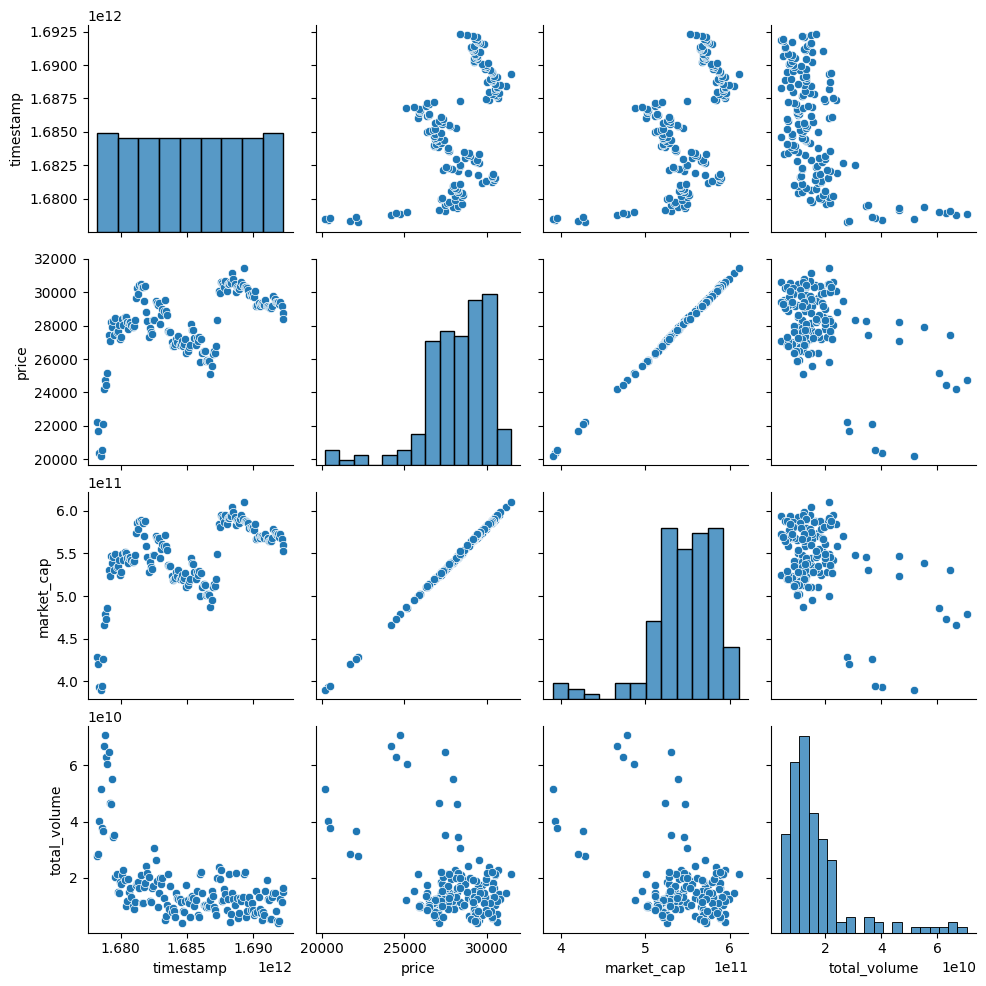

In [14]:
sns.pairplot(prices)

In [15]:
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [16]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,bitcoin,1678233600000,22217.20988,4.279949e+11,2.778036e+10
1,bitcoin,1678320000000,21712.65119,4.196950e+11,2.849303e+10
2,bitcoin,1678406400000,20376.32001,3.928418e+11,4.017383e+10
3,bitcoin,1678492800000,20195.22895,3.902023e+11,5.159389e+10
4,bitcoin,1678579200000,20521.55615,3.947427e+11,3.774666e+10


### OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [17]:
def get_coin_list():
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        list_of_ohlc = response.json()
        list_of_ohlc = pd.DataFrame(list_of_ohlc)
        return list_of_ohlc
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_ohlc = get_coin_list()
    if list_of_ohlc is not None:
        print(list_of_ohlc)

                 0            1            2            3            4
0    1689724800000  29720.02253  29814.89328  29720.02253  29814.89328
1    1689739200000  29848.03227  30049.73309  29848.03227  30014.10594
2    1689753600000  30060.61664  30173.78203  30039.39259  30039.39259
3    1689768000000  30034.22460  30034.22460  29948.78335  29986.28924
4    1689782400000  29998.83126  30034.86718  29856.46606  29856.46606
..             ...          ...          ...          ...          ...
175  1692244800000  28704.20170  28704.20170  28428.91676  28558.58686
176  1692259200000  28618.00944  28648.97747  28608.59131  28648.97747
177  1692273600000  28573.40743  28573.40743  28506.60606  28506.60606
178  1692288000000  28522.27907  28522.27907  28321.65792  28321.65792
179  1692302400000  28049.97312  28049.97312  27849.65828  27849.65828

[180 rows x 5 columns]


In [18]:
list_of_ohlc = list_of_ohlc.drop_duplicates()

In [19]:
list_of_ohlc.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [20]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       180 non-null    int64  
 1   1       180 non-null    float64
 2   2       180 non-null    float64
 3   3       180 non-null    float64
 4   4       180 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB
None


In [21]:
list_of_ohlc.head()

,0,1,2,3,4
0,1689724800000,29720.02253,29814.89328,29720.02253,29814.89328
1,1689739200000,29848.03227,30049.73309,29848.03227,30014.10594
2,1689753600000,30060.61664,30173.78203,30039.39259,30039.39259
3,1689768000000,30034.22460,30034.22460,29948.78335,29986.28924
4,1689782400000,29998.83126,30034.86718,29856.46606,29856.46606


In [22]:
# Renombrar las columnas existentes utilizando el método rename
list_of_ohlc.rename(columns={0: 'timestamp', 1: 'open_price', 2: 'high_price', 3: 'low_price', 4: 'close_price'}, inplace=True)

# Imprimir el DataFrame resultante
print(list_of_ohlc)

         timestamp   open_price   high_price    low_price  close_price
0    1689724800000  29720.02253  29814.89328  29720.02253  29814.89328
1    1689739200000  29848.03227  30049.73309  29848.03227  30014.10594
2    1689753600000  30060.61664  30173.78203  30039.39259  30039.39259
3    1689768000000  30034.22460  30034.22460  29948.78335  29986.28924
4    1689782400000  29998.83126  30034.86718  29856.46606  29856.46606
..             ...          ...          ...          ...          ...
175  1692244800000  28704.20170  28704.20170  28428.91676  28558.58686
176  1692259200000  28618.00944  28648.97747  28608.59131  28648.97747
177  1692273600000  28573.40743  28573.40743  28506.60606  28506.60606
178  1692288000000  28522.27907  28522.27907  28321.65792  28321.65792
179  1692302400000  28049.97312  28049.97312  27849.65828  27849.65828

[180 rows x 5 columns]


In [23]:
list_of_ohlc['crip_id'] = crip_id

In [24]:
list_of_ohlc = list_of_ohlc[['crip_id','timestamp','open_price','high_price','low_price','close_price']]

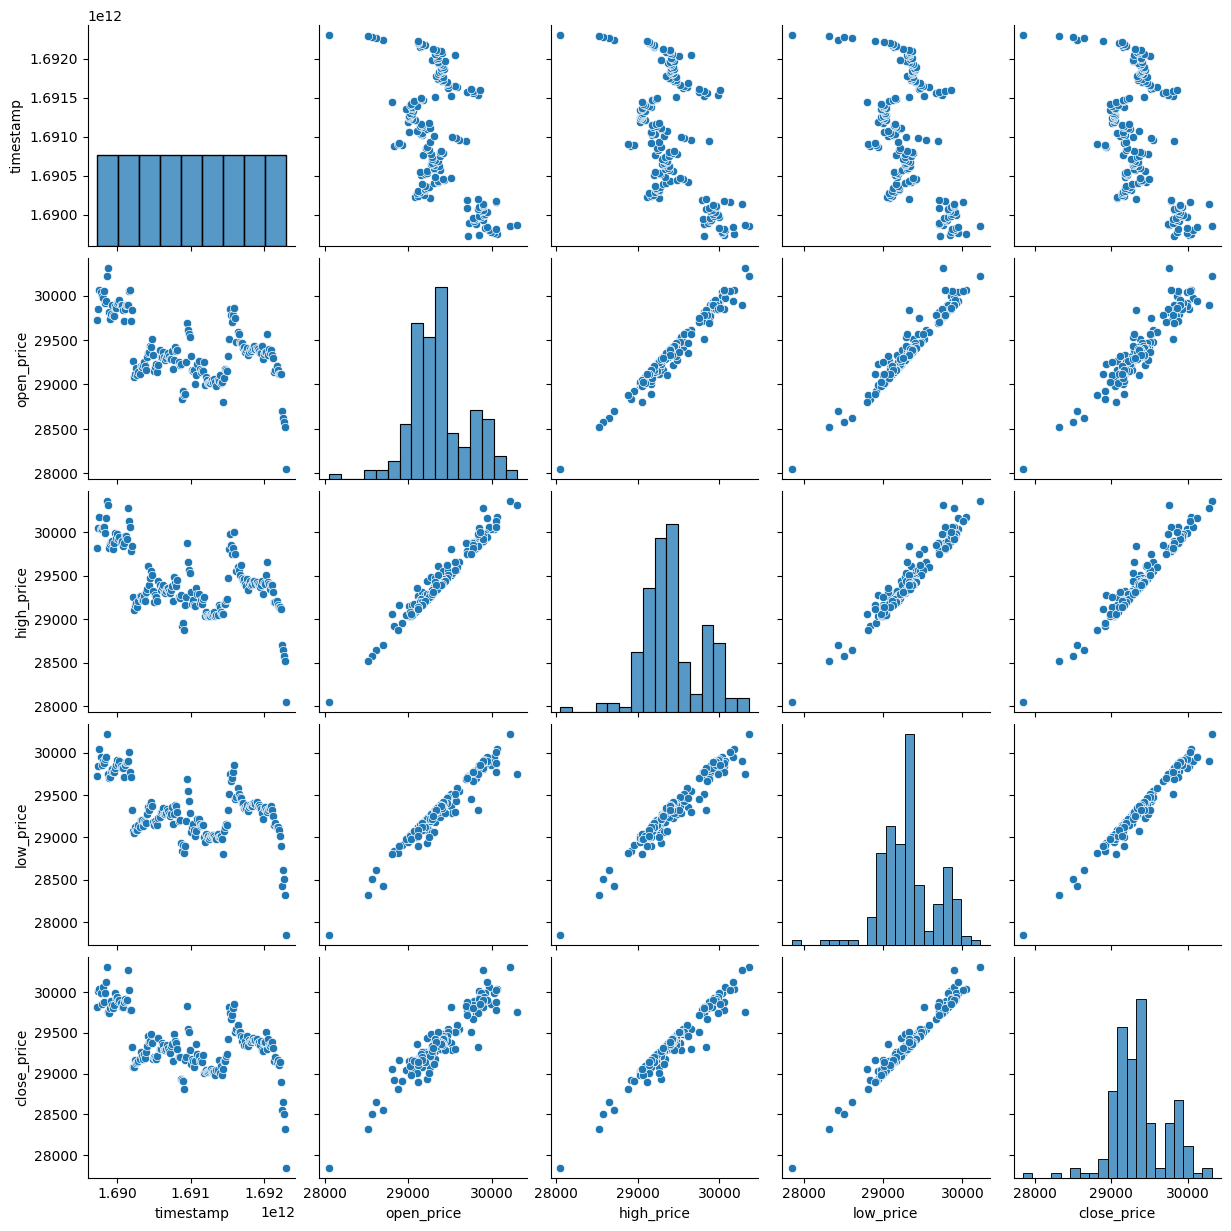

In [25]:
sns.pairplot(list_of_ohlc)

In [26]:
list_of_ohlc.head()

,crip_id,timestamp,open_price,high_price,low_price,close_price
0,bitcoin,1689724800000,29720.02253,29814.89328,29720.02253,29814.89328
1,bitcoin,1689739200000,29848.03227,30049.73309,29848.03227,30014.10594
2,bitcoin,1689753600000,30060.61664,30173.78203,30039.39259,30039.39259
3,bitcoin,1689768000000,30034.22460,30034.22460,29948.78335,29986.28924
4,bitcoin,1689782400000,29998.83126,30034.86718,29856.46606,29856.46606


### tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [27]:
def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print("Error en la solicitud de tickers:", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = "bitcoin"  # Cambia esto al ID de la moneda que te interesa
    
    ticker_data = get_coin_tickers(coin_id)
    
    if ticker_data is not None:
        # Obtener la lista de tickers
        tickers = ticker_data['tickers']
        
        # Crear un DataFrame a partir de los tickers
        ticker_df = pd.DataFrame(tickers)


In [28]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [29]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27938.00,61568.606780,"{'btc': 0.99947161, 'eth': 16.046892, 'usd': 27890}","{'btc': 62526, 'eth': 1003882, 'usd': 1744804003}",green,0.010036,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=37754157,None,bitcoin,tether
1,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27944.00,84895.214100,"{'btc': 1.001253, 'eth': 16.080553, 'usd': 27882}","{'btc': 86508, 'eth': 1389352, 'usd': 2409030483}",green,0.016012,2023-08-17T19:17:08+00:00,2023-08-17T19:17:08+00:00,2023-08-17T19:17:08+00:00,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=37754157,None,bitcoin,true-usd
2,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",27902.53,20753.699188,"{'btc': 0.99986601, 'eth': 16.052351, 'usd': 27903}","{'btc': 20751, 'eth': 333146, 'usd': 579080714}",green,0.010036,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN
3,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",27901.00,3025.494044,"{'btc': 0.99985064, 'eth': 16.052978, 'usd': 27901}","{'btc': 3025, 'eth': 48568, 'usd': 84414309}",green,0.010358,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://pro.kraken.com/app/trade/BTC-USD,None,bitcoin,NaN
4,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",27944.00,18324.656624,"{'btc': 1.000233, 'eth': 16.057251, 'usd': 27911}","{'btc': 18620, 'eth': 298924, 'usd': 519591965}",green,0.010036,2023-08-17T19:29:07+00:00,2023-08-17T19:29:07+00:00,2023-08-17T19:29:07+00:00,False,False,https://www.xt.com/en/trade/btc_usdt,None,bitcoin,tether


In [30]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = ticker_df[ticker_df.isnull().any(axis=1)]
rows_with_nulls.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27938.00,61568.606780,"{'btc': 0.99947161, 'eth': 16.046892, 'usd': 27890}","{'btc': 62526, 'eth': 1003882, 'usd': 1744804003}",green,0.010036,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=37754157,None,bitcoin,tether
1,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27944.00,84895.214100,"{'btc': 1.001253, 'eth': 16.080553, 'usd': 27882}","{'btc': 86508, 'eth': 1389352, 'usd': 2409030483}",green,0.016012,2023-08-17T19:17:08+00:00,2023-08-17T19:17:08+00:00,2023-08-17T19:17:08+00:00,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=37754157,None,bitcoin,true-usd
2,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",27902.53,20753.699188,"{'btc': 0.99986601, 'eth': 16.052351, 'usd': 27903}","{'btc': 20751, 'eth': 333146, 'usd': 579080714}",green,0.010036,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN
3,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",27901.00,3025.494044,"{'btc': 0.99985064, 'eth': 16.052978, 'usd': 27901}","{'btc': 3025, 'eth': 48568, 'usd': 84414309}",green,0.010358,2023-08-17T19:29:01+00:00,2023-08-17T19:29:01+00:00,2023-08-17T19:31:00+00:00,False,False,https://pro.kraken.com/app/trade/BTC-USD,None,bitcoin,NaN
4,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",27944.00,18324.656624,"{'btc': 1.000233, 'eth': 16.057251, 'usd': 27911}","{'btc': 18620, 'eth': 298924, 'usd': 519591965}",green,0.010036,2023-08-17T19:29:07+00:00,2023-08-17T19:29:07+00:00,2023-08-17T19:29:07+00:00,False,False,https://www.xt.com/en/trade/btc_usdt,None,bitcoin,tether


In [31]:
ticker_df['token_info_url'] = ticker_df['token_info_url'].fillna('not founded token_info_url #404')
ticker_df['trade_url'] = ticker_df['trade_url'].fillna('not founded trade_url #404')

In [32]:
ticker_df['target_coin_id'] = ticker_df['target_coin_id'].fillna('USD')

In [33]:
ticker_df.isnull().sum()

base                         0
target                       0
market                       0
last                         0
volume                       0
converted_last               0
converted_volume             0
trust_score                  0
bid_ask_spread_percentage    0
timestamp                    0
last_traded_at               0
last_fetch_at                0
is_anomaly                   0
is_stale                     0
trade_url                    0
token_info_url               0
coin_id                      0
target_coin_id               0
dtype: int64

#### Timestamp

In [34]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
ticker_df['timestamp'] = ticker_df['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
ticker_df['last_traded_at'] = ticker_df['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
ticker_df['last_fetch_at'] = ticker_df['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [35]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27938.00,61568.606780,"{'btc': 0.99947161, 'eth': 16.046892, 'usd': 27890}","{'btc': 62526, 'eth': 1003882, 'usd': 1744804003}",green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=37754157,not founded token_info_url #404,bitcoin,tether
1,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27944.00,84895.214100,"{'btc': 1.001253, 'eth': 16.080553, 'usd': 27882}","{'btc': 86508, 'eth': 1389352, 'usd': 2409030483}",green,0.016012,1692299828000,1692299828000,1692299828000,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=37754157,not founded token_info_url #404,bitcoin,true-usd
2,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",27902.53,20753.699188,"{'btc': 0.99986601, 'eth': 16.052351, 'usd': 27903}","{'btc': 20751, 'eth': 333146, 'usd': 579080714}",green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD
3,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",27901.00,3025.494044,"{'btc': 0.99985064, 'eth': 16.052978, 'usd': 27901}","{'btc': 3025, 'eth': 48568, 'usd': 84414309}",green,0.010358,1692300541000,1692300541000,1692300660000,False,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD
4,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",27944.00,18324.656624,"{'btc': 1.000233, 'eth': 16.057251, 'usd': 27911}","{'btc': 18620, 'eth': 298924, 'usd': 519591965}",green,0.010036,1692300547000,1692300547000,1692300547000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether


#### market

In [36]:
ticker_df['marketplace'] = ticker_df['market'].apply(lambda x: x['name'])
ticker_df['marketplace_id'] = ticker_df['market'].apply(lambda x: x['identifier'])

In [37]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27938.00,61568.606780,"{'btc': 0.99947161, 'eth': 16.046892, 'usd': 27890}","{'btc': 62526, 'eth': 1003882, 'usd': 1744804003}",green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=37754157,not founded token_info_url #404,bitcoin,tether,Binance,binance
1,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27944.00,84895.214100,"{'btc': 1.001253, 'eth': 16.080553, 'usd': 27882}","{'btc': 86508, 'eth': 1389352, 'usd': 2409030483}",green,0.016012,1692299828000,1692299828000,1692299828000,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=37754157,not founded token_info_url #404,bitcoin,true-usd,Binance,binance
2,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",27902.53,20753.699188,"{'btc': 0.99986601, 'eth': 16.052351, 'usd': 27903}","{'btc': 20751, 'eth': 333146, 'usd': 579080714}",green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Coinbase Exchange,gdax
3,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",27901.00,3025.494044,"{'btc': 0.99985064, 'eth': 16.052978, 'usd': 27901}","{'btc': 3025, 'eth': 48568, 'usd': 84414309}",green,0.010358,1692300541000,1692300541000,1692300660000,False,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Kraken,kraken
4,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",27944.00,18324.656624,"{'btc': 1.000233, 'eth': 16.057251, 'usd': 27911}","{'btc': 18620, 'eth': 298924, 'usd': 519591965}",green,0.010036,1692300547000,1692300547000,1692300547000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,XT.COM,xt


#### converted_last


In [38]:
ticker_df['converted_last_btc'] = ticker_df['converted_last'].apply(lambda x: x['btc'])
ticker_df['converted_last_eth'] = ticker_df['converted_last'].apply(lambda x: x['eth'])
ticker_df['converted_last_usd'] = ticker_df['converted_last'].apply(lambda x: x['usd'])

In [39]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   market                     100 non-null    object 
 3   last                       100 non-null    float64
 4   volume                     100 non-null    float64
 5   converted_last             100 non-null    object 
 6   converted_volume           100 non-null    object 
 7   trust_score                100 non-null    object 
 8   bid_ask_spread_percentage  100 non-null    float64
 9   timestamp                  100 non-null    int64  
 10  last_traded_at             100 non-null    int64  
 11  last_fetch_at              100 non-null    int64  
 12  is_anomaly                 100 non-null    bool   
 13  is_stale                   100 non-null    bool   


In [40]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27938.00,61568.606780,"{'btc': 0.99947161, 'eth': 16.046892, 'usd': 27890}","{'btc': 62526, 'eth': 1003882, 'usd': 1744804003}",green,0.010036,1692300541000,...,False,https://www.binance.com/en/trade/BTC_USDT?ref=37754157,not founded token_info_url #404,bitcoin,tether,Binance,binance,0.999472,16.046892,27890
1,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",27944.00,84895.214100,"{'btc': 1.001253, 'eth': 16.080553, 'usd': 27882}","{'btc': 86508, 'eth': 1389352, 'usd': 2409030483}",green,0.016012,1692299828000,...,False,https://www.binance.com/en/trade/BTC_TUSD?ref=37754157,not founded token_info_url #404,bitcoin,true-usd,Binance,binance,1.001253,16.080553,27882
2,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",27902.53,20753.699188,"{'btc': 0.99986601, 'eth': 16.052351, 'usd': 27903}","{'btc': 20751, 'eth': 333146, 'usd': 579080714}",green,0.010036,1692300541000,...,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Coinbase Exchange,gdax,0.999866,16.052351,27903
3,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",27901.00,3025.494044,"{'btc': 0.99985064, 'eth': 16.052978, 'usd': 27901}","{'btc': 3025, 'eth': 48568, 'usd': 84414309}",green,0.010358,1692300541000,...,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Kraken,kraken,0.999851,16.052978,27901
4,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",27944.00,18324.656624,"{'btc': 1.000233, 'eth': 16.057251, 'usd': 27911}","{'btc': 18620, 'eth': 298924, 'usd': 519591965}",green,0.010036,1692300547000,...,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,XT.COM,xt,1.000233,16.057251,27911


#### converted_volume


In [41]:
ticker_df['converted_volume_btc'] = ticker_df['converted_volume'].apply(lambda x: x['btc'])
ticker_df['converted_volume_eth'] = ticker_df['converted_volume'].apply(lambda x: x['eth'])
ticker_df['converted_volume_usd'] = ticker_df['converted_volume'].apply(lambda x: x['usd'])

In [42]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   market                     100 non-null    object 
 3   last                       100 non-null    float64
 4   volume                     100 non-null    float64
 5   converted_last             100 non-null    object 
 6   converted_volume           100 non-null    object 
 7   trust_score                100 non-null    object 
 8   bid_ask_spread_percentage  100 non-null    float64
 9   timestamp                  100 non-null    int64  
 10  last_traded_at             100 non-null    int64  
 11  last_fetch_at              100 non-null    int64  
 12  is_anomaly                 100 non-null    bool   
 13  is_stale                   100 non-null    bool   


In [43]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
ticker_df = ticker_df.drop(columns=column_drop)

In [44]:
ticker_df.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,BTC,USDT,27938.00,61568.606780,green,0.010036,1692300541000,1692300541000,1692300660000,False,...,bitcoin,tether,Binance,binance,0.999472,16.046892,27890,62526.0,1003882.0,1744804003
1,BTC,TUSD,27944.00,84895.214100,green,0.016012,1692299828000,1692299828000,1692299828000,False,...,bitcoin,true-usd,Binance,binance,1.001253,16.080553,27882,86508.0,1389352.0,2409030483
2,BTC,USD,27902.53,20753.699188,green,0.010036,1692300541000,1692300541000,1692300660000,False,...,bitcoin,USD,Coinbase Exchange,gdax,0.999866,16.052351,27903,20751.0,333146.0,579080714
3,BTC,USD,27901.00,3025.494044,green,0.010358,1692300541000,1692300541000,1692300660000,False,...,bitcoin,USD,Kraken,kraken,0.999851,16.052978,27901,3025.0,48568.0,84414309
4,BTC,USDT,27944.00,18324.656624,green,0.010036,1692300547000,1692300547000,1692300547000,False,...,bitcoin,tether,XT.COM,xt,1.000233,16.057251,27911,18620.0,298924.0,519591965


In [45]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   last                       100 non-null    float64
 3   volume                     100 non-null    float64
 4   trust_score                100 non-null    object 
 5   bid_ask_spread_percentage  100 non-null    float64
 6   timestamp                  100 non-null    int64  
 7   last_traded_at             100 non-null    int64  
 8   last_fetch_at              100 non-null    int64  
 9   is_anomaly                 100 non-null    bool   
 10  is_stale                   100 non-null    bool   
 11  trade_url                  100 non-null    object 
 12  token_info_url             100 non-null    object 
 13  coin_id                    100 non-null    object 


#### ticker_df numeric cols correlation matrix

In [46]:

# Seleccionar solo las columnas numéricas
numeric_columns = ticker_df.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

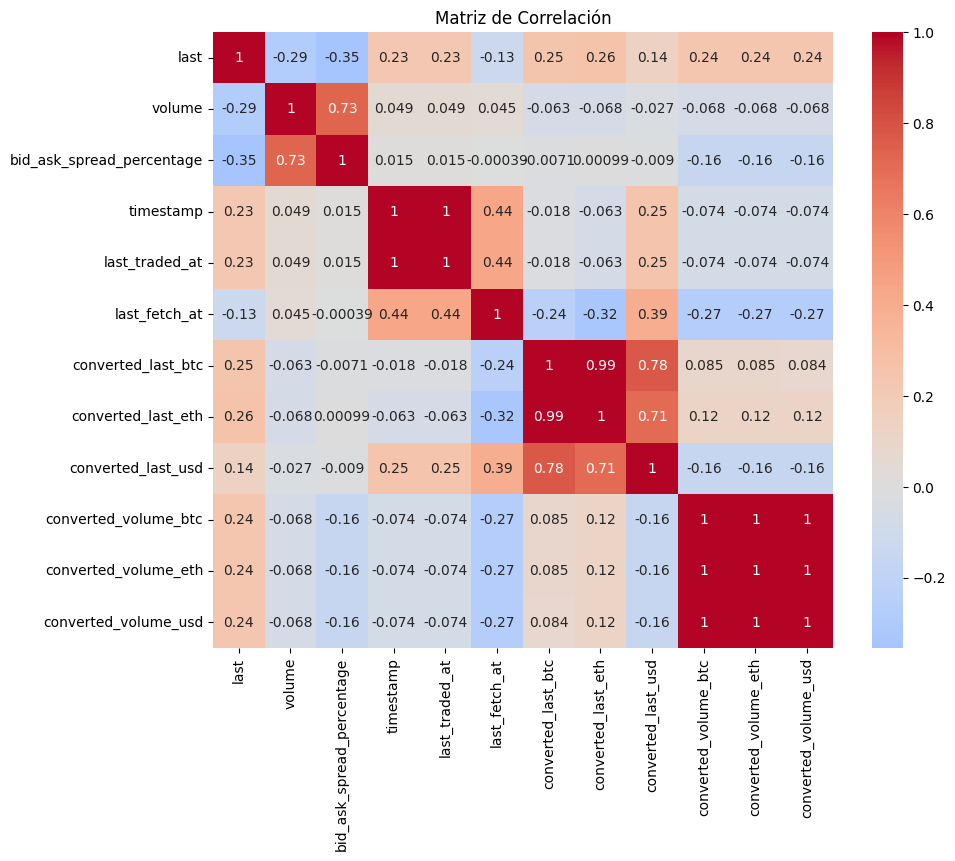

In [47]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [48]:
# Aplicar lowercase a todo el DataFrame
ticker_df = ticker_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [49]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [50]:
# Renombrar la columna
ticker_df.rename(columns={'coin_id': 'crip_id'}, inplace=True)
ticker_df.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,btc,usdt,27938.00,61568.606780,green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://www.binance.com/en/trade/btc_usdt?ref=37754157,not founded token_info_url #404,bitcoin,tether,binance,binance,0.999472,16.046892,27890,62526.0,1003882.0,1744804003
1,btc,tusd,27944.00,84895.214100,green,0.016012,1692299828000,1692299828000,1692299828000,False,False,https://www.binance.com/en/trade/btc_tusd?ref=37754157,not founded token_info_url #404,bitcoin,true-usd,binance,binance,1.001253,16.080553,27882,86508.0,1389352.0,2409030483
2,btc,usd,27902.53,20753.699188,green,0.010036,1692300541000,1692300541000,1692300660000,False,False,https://pro.coinbase.com/trade/btc-usd,not founded token_info_url #404,bitcoin,usd,coinbase exchange,gdax,0.999866,16.052351,27903,20751.0,333146.0,579080714
3,btc,usd,27901.00,3025.494044,green,0.010358,1692300541000,1692300541000,1692300660000,False,False,https://pro.kraken.com/app/trade/btc-usd,not founded token_info_url #404,bitcoin,usd,kraken,kraken,0.999851,16.052978,27901,3025.0,48568.0,84414309
4,btc,usdt,27944.00,18324.656624,green,0.010036,1692300547000,1692300547000,1692300547000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,xt.com,xt,1.000233,16.057251,27911,18620.0,298924.0,519591965


### normalized ticker_df for ML then

In [51]:
# Seleccionar solo las columnas numéricas
numeric_columns = ticker_df.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [52]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,27938.00,61568.606780,0.010036,1692300541000,1692300541000,1692300660000,0.999472,16.046892,27890,62526.0,1003882.0,1744804003
1,27944.00,84895.214100,0.016012,1692299828000,1692299828000,1692299828000,1.001253,16.080553,27882,86508.0,1389352.0,2409030483
2,27902.53,20753.699188,0.010036,1692300541000,1692300541000,1692300660000,0.999866,16.052351,27903,20751.0,333146.0,579080714
3,27901.00,3025.494044,0.010358,1692300541000,1692300541000,1692300660000,0.999851,16.052978,27901,3025.0,48568.0,84414309
4,27944.00,18324.656624,0.010036,1692300547000,1692300547000,1692300547000,1.000233,16.057251,27911,18620.0,298924.0,519591965


In [53]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [54]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.620662,0.000755,0.000046,0.924209,0.924209,0.982729,0.120897,0.138265,0.178947,0.722762,0.722539,0.724262
1,0.620795,0.001041,0.008070,0.535442,0.535442,0.264249,0.690073,0.808216,0.094737,1.000000,1.000000,1.000000
2,0.619874,0.000254,0.000046,0.924209,0.924209,0.982729,0.246913,0.246915,0.315789,0.239833,0.239744,0.240338
3,0.619840,0.000037,0.000478,0.924209,0.924209,0.982729,0.242002,0.259394,0.294737,0.034916,0.034905,0.034989
4,0.620795,0.000225,0.000046,0.927481,0.927481,0.885147,0.364171,0.344439,0.400000,0.215198,0.215111,0.215643


### Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

In [55]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

In [56]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['criptomoneda', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  criptomoneda  market_cap_percentage
0          btc              47.046340
1          eth              18.087379
2         usdt               7.183382
3          bnb               3.014649
4          xrp               2.641394
5         usdc               2.266594
6        steth               1.226689
7          ada               0.828626
8          sol               0.817256
9         doge               0.803561


In [57]:
# Extraer el contenido del diccionario en la columna "total_volume"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['criptomoneda', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   criptomoneda  total_volume
0           btc  1.999739e+06
1           eth  3.210722e+07
2           ltc  7.472578e+08
3           bch  2.722860e+08
4           bnb  2.467266e+08
..          ...           ...
56          xdr  4.177827e+10
57          xag  2.460448e+09
58          xau  2.950130e+07
59         bits  1.999739e+12
60         sats  1.999739e+14

[61 rows x 2 columns]


In [58]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['criptomoneda', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)

  criptomoneda  market_cap_percentage
0          btc              47.046340
1          eth              18.087379
2         usdt               7.183382
3          bnb               3.014649
4          xrp               2.641394
5         usdc               2.266594
6        steth               1.226689
7          ada               0.828626
8          sol               0.817256
9         doge               0.803561


### Global Eecentralized Finance(defi) data:
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [59]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.7742831845385758338385030891179970680053702993439282097847412
defi_market_cap                                           43606834094.5761569477766271749
defi_to_eth_ratio        20.8645526012059672424545121858462445619227973907068722017354364
eth_market_cap                                           208999612539.2868001573921852377
top_coin_defi_dominance                                                         32.526454
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                       1867507515.475210902391681687146


### Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [60]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
                           id  coin_id                        name  symbol  \
0                     apecoin    24383                     ApeCoin     APE   
1                 sei-network    28205                         Sei     SEI   
2                      unibot    30462                      Unibot  UNIBOT   
3  harrypotterobamapacman8inu    31241  HarryPotterObamaPacMan8Inu     XRP   
4                         arc    24235                         Arc     ARC   
5               worldcoin-wld    31069                   Worldcoin     WLD   
6                    arbitrum    16547                    Arbitrum     ARB   

   market_cap_rank  \
0               62   
1              106   
2              177   
3              514   
4              719   
5              168   
6               39   

                                                                                             thumb  \
0                     https://assets.coingecko.com/coins/images/24383/thumb/ape

In [61]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,ApeCoin,APE,62,https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455,https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455,https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455,apecoin,6.367308e-05,0
1,sei-network,28205,Sei,SEI,106,https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911,https://assets.coingecko.com/coins/images/28205/small/TKmaTqMv_400x400.jpeg?1668395911,https://assets.coingecko.com/coins/images/28205/large/TKmaTqMv_400x400.jpeg?1668395911,sei,6.579867e-06,1
2,unibot,30462,Unibot,UNIBOT,177,https://assets.coingecko.com/coins/images/30462/thumb/logonoline_%281%29.png?1687510315,https://assets.coingecko.com/coins/images/30462/small/logonoline_%281%29.png?1687510315,https://assets.coingecko.com/coins/images/30462/large/logonoline_%281%29.png?1687510315,unibot,6.103447e-03,2
3,harrypotterobamapacman8inu,31241,HarryPotterObamaPacMan8Inu,XRP,514,https://assets.coingecko.com/coins/images/31241/thumb/Pacman_Logo200x200.png?1691717643,https://assets.coingecko.com/coins/images/31241/small/Pacman_Logo200x200.png?1691717643,https://assets.coingecko.com/coins/images/31241/large/Pacman_Logo200x200.png?1691717643,harrypotterobamapacman8inu,1.287132e-05,3
4,arc,24235,Arc,ARC,719,https://assets.coingecko.com/coins/images/24235/thumb/arc.png?1647694270,https://assets.coingecko.com/coins/images/24235/small/arc.png?1647694270,https://assets.coingecko.com/coins/images/24235/large/arc.png?1647694270,arc,9.238322e-07,4
5,worldcoin-wld,31069,Worldcoin,WLD,168,https://assets.coingecko.com/coins/images/31069/thumb/worldcoin.jpeg?1690182386,https://assets.coingecko.com/coins/images/31069/small/worldcoin.jpeg?1690182386,https://assets.coingecko.com/coins/images/31069/large/worldcoin.jpeg?1690182386,worldcoin,5.274642e-05,5
6,arbitrum,16547,Arbitrum,ARB,39,https://assets.coingecko.com/coins/images/16547/thumb/photo_2023-03-29_21.47.00.jpeg?1680097630,https://assets.coingecko.com/coins/images/16547/small/photo_2023-03-29_21.47.00.jpeg?1680097630,https://assets.coingecko.com/coins/images/16547/large/photo_2023-03-29_21.47.00.jpeg?1680097630,arbitrum,3.706646e-05,6


creo que podrai realizar el ranking propio

_____________________________________________________________

### En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..